                                                                            PRACTICAL 04 : KNN ALGORITHM

KETAN D 40

AIM : To study and apply KNN techniques on given dataset.Prepare a SUV dataset for training with machine learning algorithm by applying KNN ML techniques.
·Perform basic EDA using functions like head(), tail(), describe(), shape.

·Identify & handle missing value.

·Check for duplicates and handle it.

·Identify outliers & handle it.

· Apply data encoding technique on suitable attribute.

·Apply Univariate, Bivariate & Multivariate analysis

·Apply feature scalingtechnique on suitable attribute.Split the dataset in the ratioof 80:20

· Apply KNN algorithm

·Evaluate the performance using Precision, Recall,F1 score and accuracy.

In [25]:
import pandas
df=pandas.read_csv('SN_AD.xls') #to use or promote the headers

In [26]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [28]:
df.shape

(400, 5)

In [29]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [30]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [31]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [32]:
df.drop(['User ID'], axis=1,inplace=True)
df.drop(['Gender'], axis=1,inplace=True)

In [33]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [34]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [35]:
df.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

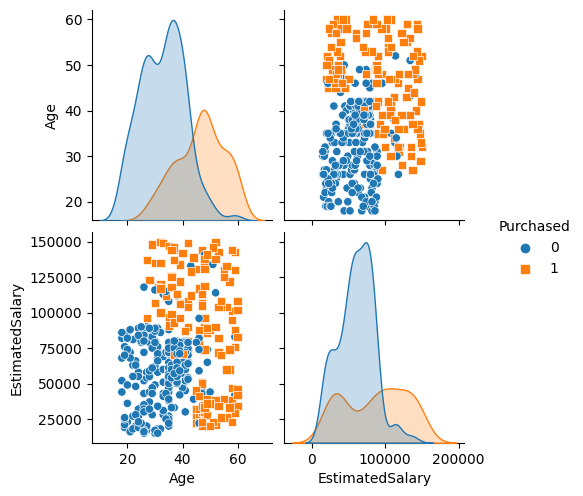

In [36]:
import seaborn as sns
sns.pairplot(df,hue="Purchased",markers=["o","s"])

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

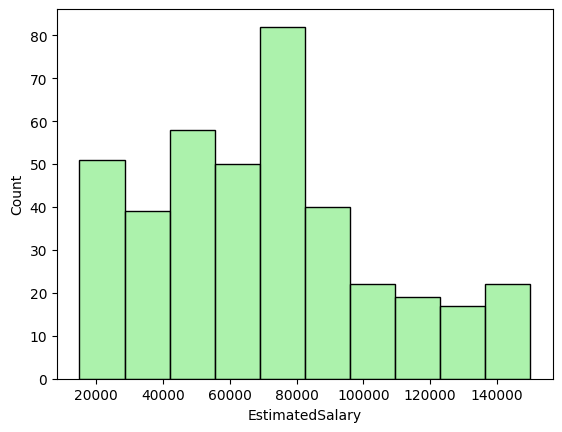

In [60]:
sns.histplot(df['EstimatedSalary'],bins=10,color='lightgreen')

<Axes: ylabel='Purchased'>

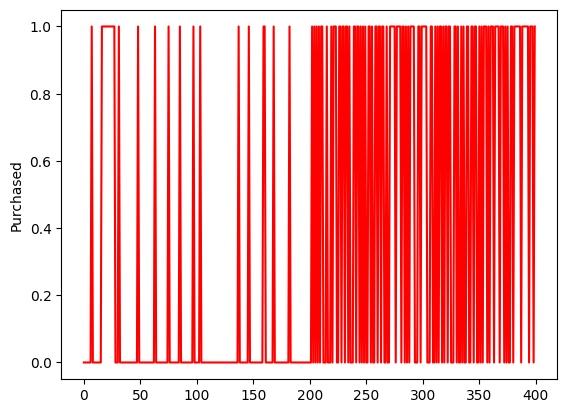

In [58]:
sns.lineplot(df['Purchased'],color='red')

In [37]:
x=df.drop(["Purchased"],axis='columns')
y=df.drop(["Age" ,"EstimatedSalary"],axis='columns')


In [38]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [39]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [40]:
#split into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [41]:
x_train

,Age,EstimatedSalary
303,37,79000
349,38,61000
149,20,74000
100,27,88000
175,23,28000
...,...,...
369,54,26000
320,52,138000
15,29,80000
125,39,61000


In [42]:
y_train

,Purchased
303,1
349,0
149,0
100,0
175,0
...,...
369,1
320,1
15,0
125,0


In [43]:
y_test

,Purchased
332,0
111,0
352,1
205,0
56,0
...,...
304,0
187,0
166,0
64,0


In [44]:
x_test

,Age,EstimatedSalary
332,42,65000
111,37,71000
352,42,90000
205,47,47000
56,23,48000
...,...,...
304,40,60000
187,33,41000
166,22,55000
64,59,83000


In [45]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix , accuracy_score
#instantiate learning model(k=5)

c=KNeighborsClassifier(n_neighbors=1)

#fitting the model

c.fit(x_train,y_train)

#predicting the Test set Results

y_pred = c.predict(x_test)


c:\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [61]:
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [62]:
y_pred.sum()

24

In [46]:
c.score(x_test,y_test) #accuracy score

0.85

Conclusion : Studied and applied KNN techniques on given SUV dataset for training with machine learning algorithm techniques.
